# Spam Detection

## Use case
You were recently hired in start up company and you were asked to build a system to identify spam emails.


## Importing Libraries

In [1]:
#Import libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from collections import Counter
import string
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
G:\DOWNLOADS\Programs\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
G:\DOWNLOADS\Programs\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('C:/Users/HP/Desktop/folders/Project_2/messages.csv')
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
# converting all messages to lower case

df['message'] = df['message'].str.lower()

In [4]:
# check data once 
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


## Data Cleansing

In [5]:
# checing null values 
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

From here we can observe that data is missing here .

In [6]:
df.fillna(df['subject'].mode().values[0],inplace=True)

In [7]:
# let's once again 
df.isnull().sum()

subject    0
message    0
label      0
dtype: int64

Now it's looking perfect and move on to next step's .

## Feature Engineering 

To get clarity about mail i'm going to merge both subject and message .

In [8]:
df['sub_mssg']=df['subject']+df['message']
df.head()

,subject,message,label,sub_mssg
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j..."
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...


In [9]:
df['sub_mssg'].describe()

count                                                  2893
unique                                                 2876
top       re := 20 the virtual girlfriend and virtual bo...
freq                                                      4
Name: sub_mssg, dtype: object

In [10]:
df['length']=df['sub_mssg'].apply(len)
df.head()

,subject,message,label,sub_mssg,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


In [11]:
#now i'm going to drop un-necessary features 
df.drop('subject',axis=1,inplace=True)

In [12]:
# check it once 
df.head()

,message,label,sub_mssg,length
0,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816
2,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
3,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


## Data Visualization 

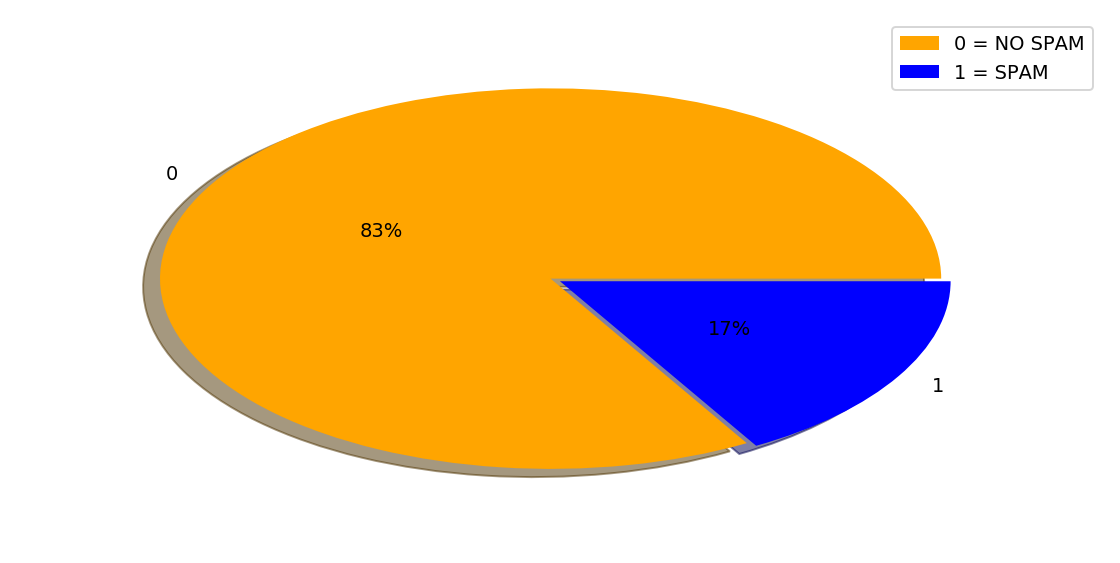

In [13]:
lb=df['label'].value_counts().index.tolist()
val=df['label'].value_counts().values.tolist()
exp=(0.025,0)
clr=('orange','blue')
plt.figure(figsize=(10,5),dpi=140)
plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(["0 = NO SPAM",'1 = SPAM'])
plt.show()

## Preprocessing Email Messages :

In [14]:
df['message'][0]

"content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical language modeling ; text tokenization and

In [15]:
import re

In [16]:
def decontact(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [17]:
mssg=decontact(df['message'][70])
mssg

'hi , i am new to the list . and since english is not my first language , i apologize for the mistakes you might find below : - ) . i hope that you will not mind if some of my explanations are in french . for my ph . d . semiotics , i am writing a dissertation on discourse and science-fiction and i need some information about the construction of neologisms in french and in english . ( neologisms are useful in sf , specially in the scientific field ! ) in french , neologisms are made in 5 different ways ( i hope these are the right english words ) : derivation ; composition ; imitation ; pure invention ; amalgam . one might also add borrowings from other languages . here are some examples ( sorry , the explanations are in french ) : - derivation : mot derive : " position " peut produire le verbe " positionner " ; - composition : mot compose : si " monotone " est decompose ( " mono " / " tone " ) , on peut recomposer " polytone " ; a partir de " telephone " on peut produire en science-fi

In [18]:
#REPLACING NUMBERS
df['sub_mssg']=df['sub_mssg'].str.replace(r'\d+(\.\d+)?', 'numbers')
df['sub_mssg'][0]

"job posting - apple-iss research centercontent - length : numbers apple-iss research center a us $ numbers million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statis

In [19]:
#CONVRTING EVERYTHING TO LOWERCASE
df['sub_mssg']=df['sub_mssg'].str.lower()
#REPLACING NEXT LINES BY 'WHITE SPACE'
df['sub_mssg']=df['sub_mssg'].str.replace(r'\n'," ") 
# REPLACING EMAIL IDs BY 'MAILID'
df['sub_mssg']=df['sub_mssg'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')
# REPLACING URLs  BY 'Links'
df['sub_mssg']=df['sub_mssg'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
# REPLACING CURRENCY SIGNS BY 'MONEY'
df['sub_mssg']=df['sub_mssg'].str.replace(r'£|\$', 'Money')
# REPLACING LARGE WHITE SPACE BY SINGLE WHITE SPACE
df['sub_mssg']=df['sub_mssg'].str.replace(r'\s+', ' ')

# REPLACING LEADING AND TRAILING WHITE SPACE BY SINGLE WHITE SPACE
df['sub_mssg']=df['sub_mssg'].str.replace(r'^\s+|\s+?$', '')
#REPLACING CONTACT NUMBERS
df['sub_mssg']=df['sub_mssg'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number')
#REPLACING SPECIAL CHARACTERS  BY WHITE SPACE 
df['sub_mssg']=df['sub_mssg'].str.replace(r"[^a-zA-Z0-9]+", " ")

In [20]:
#CONVRTING EVERYTHING TO LOWERCASE
df['message']=df['message'].str.lower()
#REPLACING NEXT LINES BY 'WHITE SPACE'
df['message']=df['message'].str.replace(r'\n'," ") 
# REPLACING EMAIL IDs BY 'MAILID'
df['message']=df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')
# REPLACING URLs  BY 'Links'
df['message']=df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
# REPLACING CURRENCY SIGNS BY 'MONEY'
df['message']=df['message'].str.replace(r'£|\$', 'Money')
# REPLACING LARGE WHITE SPACE BY SINGLE WHITE SPACE
df['message']=df['message'].str.replace(r'\s+', ' ')

# REPLACING LEADING AND TRAILING WHITE SPACE BY SINGLE WHITE SPACE
df['message']=df['message'].str.replace(r'^\s+|\s+?$', '')
#REPLACING CONTACT NUMBERS
df['message']=df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number')
#REPLACING SPECIAL CHARACTERS  BY WHITE SPACE 
df['message']=df['message'].str.replace(r"[^a-zA-Z0-9]+", " ")

In [21]:
df['sub_mssg'][0]

'job posting apple iss research centercontent length numbers apple iss research center a us Money numbers million joint venture between apple computer inc and the institute of systems science of the national university of singapore located in singapore is looking for a senior speech scientist the successful candidate will have research expertise in computational linguistics including natural language processing and english and chinese statistical language modeling knowledge of state of the art corpus based n gram language models cache language models and part of speech language models are required a text to speech project leader the successful candidate will have research expertise expertise in two or more of the following areas computational linguistics including natural language parsing lexical database design and statistical language modeling text tokenization and normalization prosodic analysis substantial knowledge of the phonology syntax and semantics of chinese is required knowl

Now message looking perfect .

In [22]:
df.head()

,message,label,sub_mssg,length
0,content length 3386 apple iss research center ...,0,job posting apple iss research centercontent l...,2895
1,lang classification grimes joseph e and barbar...,0,sociolinguisticslang classification grimes jos...,1816
2,i am posting this inquiry for sergei atamas sa...,0,query letter frequencies for text identificati...,1485
3,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


In [23]:
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
# removing stopwords 
stop = stopwords.words('english')
df['Cleaned_Text'] = df['sub_mssg'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [24]:
df.head()

,message,label,sub_mssg,length,Cleaned_Text
0,content length 3386 apple iss research center ...,0,job posting apple iss research centercontent l...,2895,job posting apple iss research centercontent l...
1,lang classification grimes joseph e and barbar...,0,sociolinguisticslang classification grimes jos...,1816,sociolinguisticslang classification grimes jos...
2,i am posting this inquiry for sergei atamas sa...,0,query letter frequencies for text identificati...,1485,query letter frequencies text identificationi ...
3,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328,riska colleague researching differing degrees ...
4,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070,request book informationearlier morning phone ...


In [25]:
df.drop('message',axis=1,inplace=True)

In [26]:
df.drop('sub_mssg',axis=1,inplace=True)

In [27]:
df.head()

,label,length,Cleaned_Text
0,0,2895,job posting apple iss research centercontent l...
1,0,1816,sociolinguisticslang classification grimes jos...
2,0,1485,query letter frequencies text identificationi ...
3,0,328,riska colleague researching differing degrees ...
4,0,1070,request book informationearlier morning phone ...


In [28]:
df.isnull().sum()

label           0
length          0
Cleaned_Text    0
dtype: int64

In [29]:
df['lgth_clean']=df['Cleaned_Text'].apply(len)
df.head()

,label,length,Cleaned_Text,lgth_clean
0,0,2895,job posting apple iss research centercontent l...,2108
1,0,1816,sociolinguisticslang classification grimes jos...,1506
2,0,1485,query letter frequencies text identificationi ...,1150
3,0,328,riska colleague researching differing degrees ...,216
4,0,1070,request book informationearlier morning phone ...,653


In [30]:
original_length=sum(df['length'])
after_cleaning=sum(df['lgth_clean'])

In [31]:
print("original_length",original_length)
print('after_cleaning',after_cleaning)

original_length 9437398
after_cleaning 6847913


## Training Model

In [32]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.pipeline import Pipeline

## Logistic Regression

In [33]:
tvec = TfidfVectorizer()
lr = LogisticRegression(solver = "lbfgs")

In [34]:
X = df.Cleaned_Text
Y = df.label

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 225,stratify=Y)

In [35]:
model = Pipeline([('vectorizer',tvec),('classifier',lr)])

model.fit(X_train,Y_train)


from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

confusion_matrix(y_pred,Y_test)

array([[242,   8],
       [  0,  40]], dtype=int64)

In [36]:
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))


Accuracy :  0.9724137931034482
Precision :  0.9770114942528735
Recall :  0.9724137931034482


## KNeighbors Classifier

In [37]:
knc = KNeighborsClassifier()
model_1 = Pipeline([('vectorizer',tvec),('classifier',knc)])
model_1.fit(X_train,Y_train)


y_pred = model_1.predict(X_test)

print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[231   2]
 [ 11  46]]
Accuracy :  0.9551724137931035
Precision :  0.9552899686520375
Recall :  0.9551724137931035


## Ada Boost Classifier

In [38]:
abc = AdaBoostClassifier()
model_3 = Pipeline([('vectorizer',tvec),('classifier',abc)])
model_3.fit(X_train,Y_train)


y_pred = model_3.predict(X_test)

print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[241   3]
 [  1  45]]
Accuracy :  0.9862068965517241
Precision :  0.9866094328868624
Recall :  0.9862068965517241


## Naive Bayes

In [39]:
mnb = MultinomialNB()
model_5 = Pipeline([('vectorizer',tvec),('classifier',mnb)])
model_5.fit(X_train,Y_train)


y_pred = model_5.predict(X_test)

print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[242  37]
 [  0  11]]
Accuracy :  0.8724137931034482
Precision :  0.9707614942528735
Recall :  0.8724137931034482


## Gradient Boosting Classifier

In [40]:
gbc = GradientBoostingClassifier()
model_6= Pipeline([('vectorizer',tvec),('classifier',gbc)])
model_6.fit(X_train,Y_train)


y_pred = model_6.predict(X_test)
print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[241   8]
 [  1  40]]
Accuracy :  0.9689655172413794
Precision :  0.9728887622304552
Recall :  0.9689655172413794


## Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(random_state=42)
model_7 = Pipeline([('vectorizer',tvec),('classifier',rfc)])

model_7.fit(X_train,Y_train)

y_pred = model_7.predict(X_test)
print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[242   5]
 [  0  43]]
Accuracy :  0.9827586206896551
Precision :  0.9845545977011494
Recall :  0.9827586206896551


From here we can observe that Random forest classifier working well compared to all other algorithms

## Testing Model

In [42]:
result=model_7.predict(['your microsoft account has been compromised ,you must update before or else your account going to close click to update'])
result

array([0], dtype=int64)

In [43]:
result=model_7.predict(['Today we want to inform you that the application period for 15.000 free Udacity Scholarships in Data Science is now open! Please apply by November 16th, 2020 via https://www.udacity.com/bertelsmann-tech-scholarships.'])
result

array([1], dtype=int64)

Here 0 is spam and 1 is normal message.

#  EOF DONE CLASSIFICATION OF SPAM CLASSIFICATION 